# Laboratorio 03 - MLFlow y Feast

* Curso: Machine Learning
* Integrantes: Javier Alvarado

## Ejercicio 01

In [2]:
%pip install mlflow
%pip install feast
%pip install scikit-learn
%pip install pandas numpy matplotlib seaborn

  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)
  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl (7.8 MB)
  Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl (11.2 MB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.60.1-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
  Using cached pillow-11.3.0-cp39-cp39-win_amd64.whl (7.0 MB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl (55 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl (211 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)
  Using cached requests-2.32.5-py3-none-any.whl (64 kB)
  Using cached markupsafe-3.0.3-cp39-cp39-win_amd64.whl (15 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl (16 kB)
  Using cached click-8.

You should consider upgrading via the 'c:\Users\Alvar\OneDrive\Documentos\SemestreX\Machine Learning\Lab03-MLFeast\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Using cached jsonschema-4.25.1-py3-none-any.whl (90 kB)
  Using cached referencing-0.36.2-py3-none-any.whl (26 kB)
  Using cached rpds_py-0.27.1-cp39-cp39-win_amd64.whl (228 kB)
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic-core 2.41.4
    Uninstalling pydantic-core-2.41.4:
      Successfully uninstalled pydantic-core-2.41.4
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.12.3
    Uninstalling pydantic-2.12.3:
      Successfully uninstalled pydantic-2.12.3
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: uvicorn
    Found existing installation: uvicorn 0.38.0
    Uninstalling uvicorn-0.38.0:
      Successfully uninstalled uvicorn-0.38

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

uvicorn-worker 0.4.0 requires uvicorn>=0.36.0, but you'll have uvicorn 0.34.0 which is incompatible.
You should consider upgrading via the 'c:\Users\Alvar\OneDrive\Documentos\SemestreX\Machine Learning\Lab03-MLFeast\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Alvar\OneDrive\Documentos\SemestreX\Machine Learning\Lab03-MLFeast\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Alvar\OneDrive\Documentos\SemestreX\Machine Learning\Lab03-MLFeast\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
# Verificación de instalación de MLflow y Feast

# TODO: Importar librerías necesarias
import mlflow
import feast

# TODO: Imprimir versiones de mlflow y feast
print("Versión de MLflow:", mlflow.__version__)
print("Versión de Feast:", feast.__version__)


Versión de MLflow: 3.1.4
Versión de Feast: 0.49.0


## Ejercicio 02

In [ ]:
# Ejercicio 2 - Carga y Exploración de Datos

# 2.1 Carga del Dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd

california = fetch_california_housing()

df = pd.DataFrame(california.data, columns=california.feature_names)

df['MedHouseVal'] = california.target

print("Primeras 5 filas del dataset:")
print(df.head())
print("\nInformación básica del dataset:")
print(f"Forma del dataset: {df.shape}")
print("\nTipos de datos:")
print(df.dtypes)


Primeras 5 filas del dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Información básica del dataset:
Forma del dataset: (20640, 9)

Tipos de datos:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


📊 Estadísticas descriptivas:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min

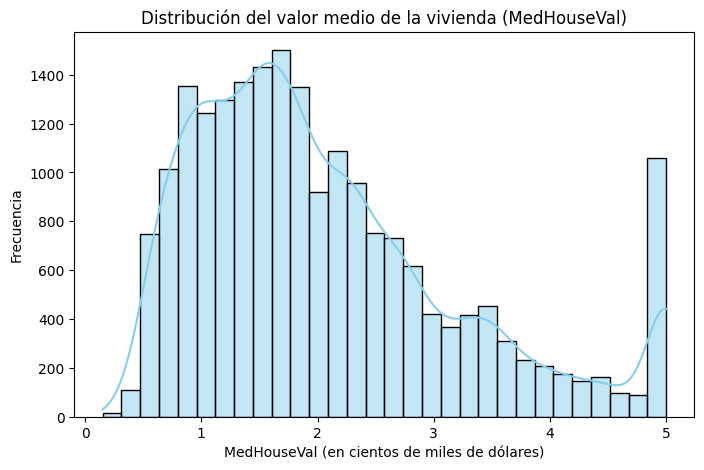

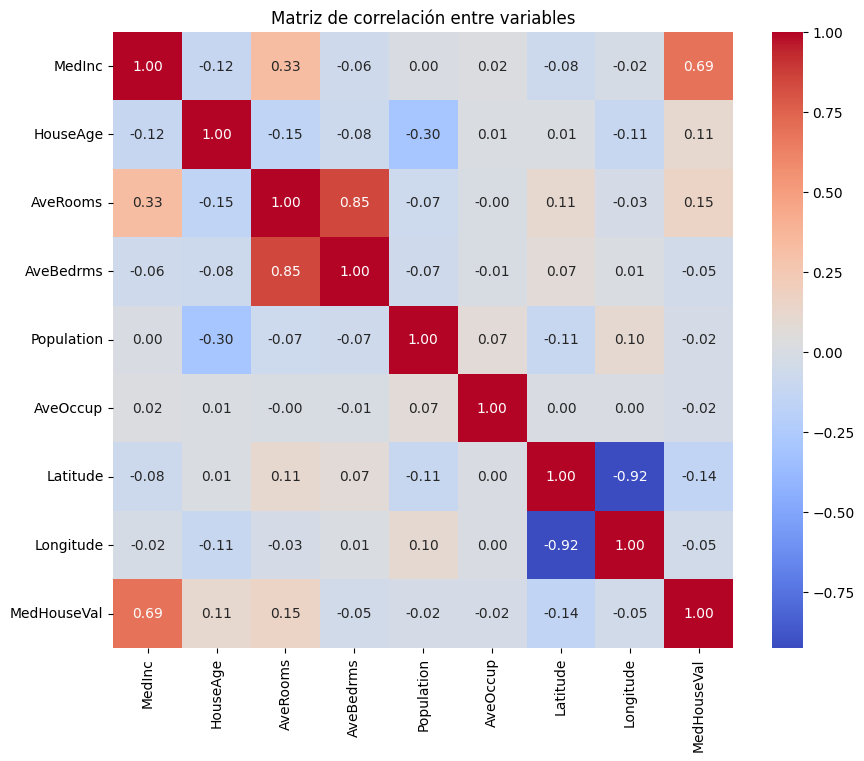

In [ ]:
# Ejercicio 2.2 - Análisis Exploratorio

import matplotlib.pyplot as plt
import seaborn as sns

print("📊 Estadísticas descriptivas:")
print(df.describe())

print("\n🔍 Valores faltantes por columna:")
print(df.isnull().sum())

plt.figure(figsize=(8, 5))
sns.histplot(df['MedHouseVal'], kde=True, bins=30, color='skyblue')
plt.title("Distribución del valor medio de la vivienda (MedHouseVal)")
plt.xlabel("MedHouseVal (en cientos de miles de dólares)")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()


## Ejercicio 03

In [6]:
# Ejercicio 3 - Preparación de Datos

from sklearn.model_selection import train_test_split

# 3.1 División de Datos
# TODO: Separar features (X) y target (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# TODO: Dividir en train y test con random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)


# 3.2 Feature Engineering
# TODO: Crear features derivadas
X_train = X_train.copy()
X_test = X_test.copy()

X_train['rooms_per_household'] = X_train['AveRooms'] / X_train['HouseAge']
X_train['rooms_per_population'] = X_train['AveRooms'] / X_train['AveOccup']
X_train['bedrooms_per_room'] = X_train['AveBedrms'] / X_train['AveRooms']

X_test['rooms_per_household'] = X_test['AveRooms'] / X_test['HouseAge']
X_test['rooms_per_population'] = X_test['AveRooms'] / X_test['AveOccup']
X_test['bedrooms_per_room'] = X_test['AveBedrms'] / X_test['AveRooms']

# TODO: Actualizar los conjuntos de entrenamiento y prueba
print("\n✅ Nuevas columnas añadidas:")
print([col for col in X_train.columns if col not in df.columns])

print("\n📏 Nuevo tamaño de X_train:", X_train.shape)
print("📏 Nuevo tamaño de X_test:", X_test.shape)


Tamaño de X_train: (16512, 8)
Tamaño de X_test: (4128, 8)
Tamaño de y_train: (16512,)
Tamaño de y_test: (4128,)

✅ Nuevas columnas añadidas:
['rooms_per_household', 'rooms_per_population', 'bedrooms_per_room']

📏 Nuevo tamaño de X_train: (16512, 11)
📏 Nuevo tamaño de X_test: (4128, 11)
